## An experimentation of Object Detection technologies

Just testing out a few trending and SOTA models on object and face detection to understand them. This will enable me to get useful insights on their use cases then implement optimal model for my problem.

In [10]:
import torch
import torchvision
from matplotlib import pyplot as plt
import numpy as np
from ultralytics import YOLO
from ultralytics.yolo.utils import ops
import cv2

In [59]:
# load a pretrained YOLO v8 model from ultralytics
model = YOLO('yolov8n.pt') # 'yolov8n.yaml' for new model from scratch
# model2 = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT)

In [67]:
IMAGES_TO_TRAIN = "/home/ashmitbhattarai/Codes/face_detection_model_family/data/images"
labels = ["samjhu"]
number_images = 20

## Collecting Training and Val Data

In [68]:
import time
import os
from uuid import uuid1

# if cam:
#     cam.release()
#     cv2.destroyAllWindows()
cam = cv2.VideoCapture(0)
if (cam.isOpened() == False): 
    print("Error reading video file")
    cam.release()
    cv2.destroyAllWindows()
else:
    try:
        for label in labels:
            print (f"capturing Images for {label}")
            time.sleep(5)
            for i in range(number_images):
                ret, frame = cam.read()
                imagename = str(uuid1())+".jpg"
                file_folder = os.path.join(IMAGES_TO_TRAIN,label)

                filepath = os.path.join(file_folder,imagename)
                print (filepath,f"writing file for {label}",i)
                cv2.imshow("Data Capture",frame)
                cv2.imwrite(filepath,frame)
                time.sleep(5)

        cam.release()
        cv2.destroyAllWindows()
    except Exception as e:
        print (e)
        cam.release()
        cv2.destroyAllWindows()



capturing Images for samjhu
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/samjhu/153fee80-0678-11ee-aa54-4851c5e7243a.jpg writing file for samjhu 0
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/samjhu/183d376e-0678-11ee-aa54-4851c5e7243a.jpg writing file for samjhu 1
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/samjhu/1b39484a-0678-11ee-aa54-4851c5e7243a.jpg writing file for samjhu 2
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/samjhu/1e355b7e-0678-11ee-aa54-4851c5e7243a.jpg writing file for samjhu 3
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/samjhu/213176c8-0678-11ee-aa54-4851c5e7243a.jpg writing file for samjhu 4
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/samjhu/242d9f96-0678-11ee-aa54-4851c5e7243a.jpg writing file for samjhu 5
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/samjhu/2729ab40-0678-11ee-aa54-4851c5e7243a.jpg writ

KeyboardInterrupt: 

: 

In [ ]:
# model.model # to display the architechture of the model itself
# results = model(url/path of the iamge)
# results.print()

# Printing the evaluated image
#plt.imsshow(np.squeeze(results.render())) # np.squeeze here actually remove outer 1 dim array and 
# plt.show()

### the read coding begins here
#### testing the camera using different models
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results[0].plot()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()

cv2.destroyAllWindows()


## Train the model

In [60]:
# labelling images
# https://labelstud.io/guide/get_started.html#Quick-start
# pip install label-studio
# training the Yolov8 model
dataset_yaml = "../dataset.yaml"
model.train(data=dataset_yaml,epochs=72,batch=16,imgsz=320,workers=1,agnostic_nms=True) # workers is causing bit of a problem in Pytorch now

Ultralytics YOLOv8.0.114 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 7966MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../dataset.yaml, epochs=72, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=True, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

## Load Custom model

In [61]:
new_model = YOLO('/home/ashmitbhattarai/Codes/face_detection_model_family/notebooks/runs/detect/train4/weights/last.pt')

In [65]:
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results[0].plot()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()

cv2.destroyAllWindows()


0: 256x320 2 rameshs, 3.5ms
Speed: 1.5ms preprocess, 3.5ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 2 rameshs, 3.2ms
Speed: 0.3ms preprocess, 3.2ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 glasses, 2 rameshs, 3.4ms
Speed: 0.4ms preprocess, 3.4ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 glasses, 2 rameshs, 3.5ms
Speed: 0.3ms preprocess, 3.5ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 glasses, 2 rameshs, 3.2ms
Speed: 0.3ms preprocess, 3.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 ashmit, 1 glasses, 1 ramesh, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 ashmit, 1 glasses, 1 ramesh, 4.4ms
Speed: 0.5ms preprocess, 4.4ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 1 ashmit, 1 glasses, 1 samjhu, 4.6ms
Spe


image 1/1 /home/ashmitbhattarai/Codes/face_detection_model_family/data/images/train/images/0301fcd2-40c65232-05ed-11ee-93ea-4851c5e7243a.jpg: 256x320 1 ashmit, 2 glassess, 1 ramesh, 1 samjhu, 5.7ms
Speed: 15.5ms preprocess, 5.7ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 320)


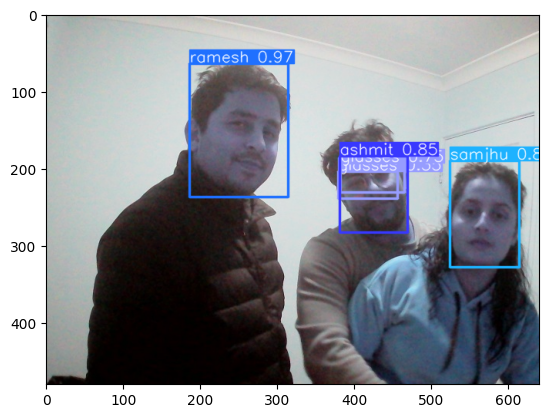

In [64]:
%matplotlib inline
result = new_model('/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/train/images/0301fcd2-40c65232-05ed-11ee-93ea-4851c5e7243a.jpg')
# print (result[0])
plt.imshow(np.squeeze(result[0].plot()))
plt.show()

### Object Tracking

Now we have the model in decent stages, we now start tracking the individials' movement. The end goal here is to find people who are approaching my home and to identify them.